In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-tpbvp-mems)

To solve this problem, we have to define functions for the ODE and boundary conditions. The first returns the computed values of $y_1'$ and $y_2'$.

In [2]:
lamb = 0.6
def ode(r, y):
    return array([
        y[1],
        lamb / y[0]**2 - y[1] / r
    ])

To encode the boundary conditions $y_2(0)=0$, $y_1(2)=1$, we define a function for their residual values.

In [3]:
def bc(ya, yb):    # given y(a), y(b)
    return array([
        ya[1],
        yb[0] - 1
    ])

The domain of the mathematical problem is $r\in [0,1]$. However, there is a division by $r$ in the ODE, so we want to avoid $r=0$ by truncating the domain a bit.

In [4]:
a, b = finfo(float).eps, 1

We need one last ingredient that is not part of the mathematical setup: an initial estimate for the solution. As we will see, this plays the same role as initialization in Newton's method for rootfinding. Here, we try a constant value for each component.

In [5]:
r = linspace(a, b, 50)
y_init = vstack([ones(r.size), zeros(r.size)])

Now we can solve the problem using `solve_bvp` from `scipy.integrate`.

Solved at 998 nodes.


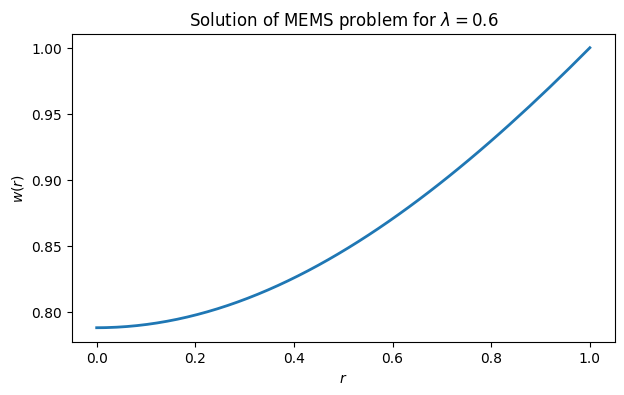

In [6]:
from scipy.integrate import solve_bvp
sol = solve_bvp(ode, bc, r, y_init)
print(f"Solved at {sol.x.size} nodes.")
plot(sol.x, sol.y[0])
xlabel("$r$"),  ylabel("$w(r)$")
title("Solution of MEMS problem for $\\lambda=0.6$");